# Latihan 2: Polynomial Regression (pakai `PolynomialFeatures`, tanpa Pipeline)

Notebook ini versi yang sama seperti `latihan-bebas.ipynb`, tapi pembuatan fitur polinomial dilakukan dengan `PolynomialFeatures`.

Inti alur:
- Buat data (contoh: $y = x^2 + 5x + 10 + noise$)
- Ubah `x` (1D) menjadi `X` (2D) agar cocok dengan scikit-learn
- Transform `X` → `X_poly` menggunakan `PolynomialFeatures`
- Fit `LinearRegression` pada `X_poly`
- Plot prediksi model

In [12]:
# -------------- IMPORT --------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# -------------- IMPORT --------------

# ---------- FUNCTION ----------
def debugging(key, data):
    print(f'\n{key}:\n{data}')

def persamaaKuadratNumpy(x):
    totalData = x.shape[0]
    noise = np.random.normal(0, 30, size=totalData)
    return x**2 + 5*x + 10 + noise
# ---------- FUNCTION ----------

# ---------- SETUP ----------
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)
# ---------- SETUP ----------

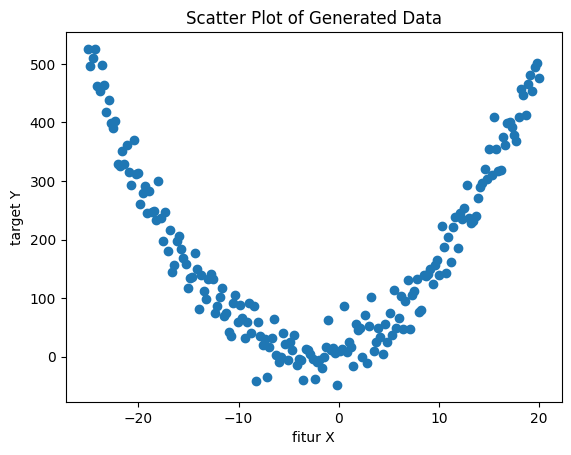

In [13]:
# ---------- STEP 1 ----------
# untuk membuat data dummy x dan y rentang -20 sampai 20, sebanyak 200 item
# ----------------------------
totalData = 200

np.random.seed(42)

x_train = np.linspace(-25, 20, totalData)
y_train = persamaaKuadratNumpy(x_train)

# debugging('x_train', x_train)
# debugging('y_train', y_train)

# scikit-learn butuh input fitur 2D: (n_samples, n_features)
x_train_reshape = x_train.reshape(-1, 1)

# debugging('x_train_reshape', x_train_reshape)

plt.scatter(x_train, y_train)
plt.title('Scatter Plot of Generated Data')
plt.xlabel('fitur X')
plt.ylabel('target Y')
plt.show()

# ---------- STEP 1 ----------

In [14]:
# ---------- STEP 2 ----------
# convert 1 fitur menjadi fitur polinomial dengan PolynomialFeatures (tanpa Pipeline)
# ----------------------------
degree = 2

# include_bias=False karena LinearRegression sudah punya intercept
poly = PolynomialFeatures(degree=degree, include_bias=False)
poly.fit(x_train_reshape)
x_train_poly = poly.transform(x_train_reshape)

# debugging('x_train_poly', x_train_poly)
# ---------- STEP 2 ----------

In [15]:
# ---------- STEP 3 ----------
# terapkan 2 fitur dan 1 target di LinearRegression
# ----------------------------
regresi = LinearRegression()
regresi.fit(x_train_poly, y_train)
y_predict = regresi.predict(x_train_poly)

# debugging('x_train_poly', x_train_poly)
# debugging('y_train', y_train)
# debugging('y_predict', y_predict)
# ---------- STEP 3 ----------

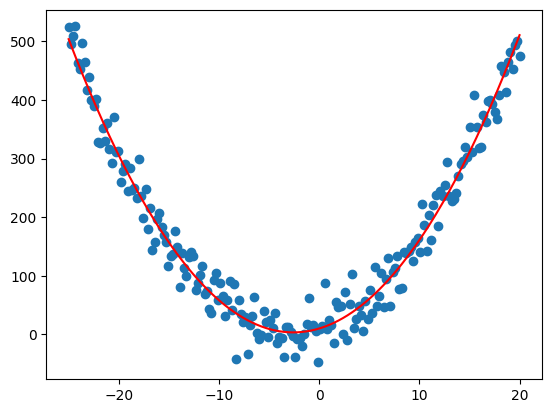

In [16]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predict, color='red')
plt.show()